/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1544: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


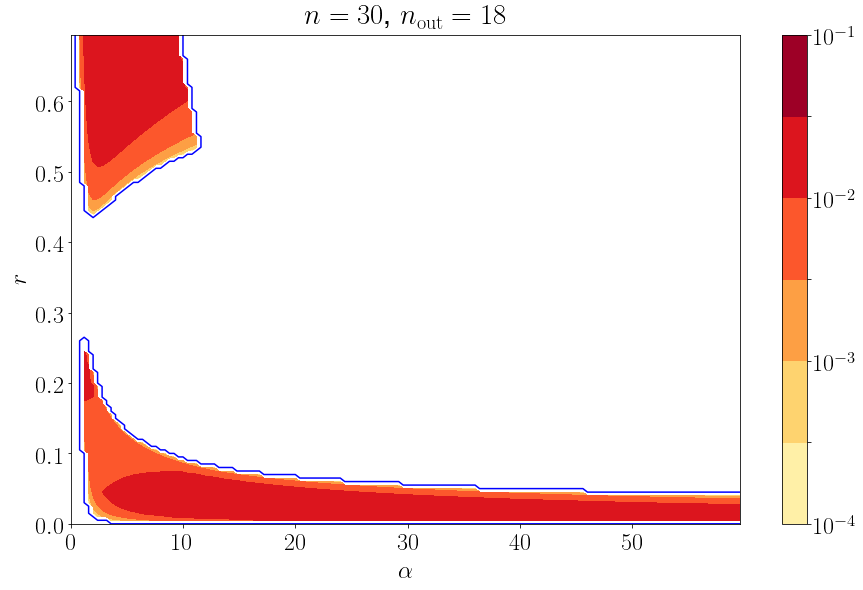

In [13]:
import mf_mdp as mm

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from matplotlib.colors import LogNorm
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':24})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('xtick', labelsize=24)
rc('ytick', labelsize=24)

# Here is represented dependance between gap and dynamical parameters of system

############
#parameters
############
dr = 0.005
dalpha = 0.4
max_alpha = 60
max_r = 0.7
n = 30
q = 9
epsilon = 0.05
############
############

gaps = np.array([])
alpha = 0.
y = np.arange(0, max_r, dr)
x = np.arange(0, max_alpha, dalpha)
for k in range(int(max_alpha/dalpha)):
    r = 0.
    for m in range(int(max_r/dr)):
        model = mm.mf_mdp_model(n = n, q = q, epsilon = epsilon, alpha = alpha, r = r)
        gap = model.gap()
        gaps = np.append(gaps, gap)
        r = r + dr
    alpha = alpha + dalpha
gaps = gaps.reshape(-1, int(max_r/dr))
gaps = gaps.T

#plotting

lvls = [10**(-4.), 10**(-3.5), 10**(-3), 10**(-2.5), 10**(-2), 10**(-1.5), 10**(-1)]
fig = plt.figure()
fig.set_size_inches(15., 9.)
ax   = fig.add_subplot(1,1,1)
axim = ax.contourf(x, y, np.abs(gaps), levels=lvls, cmap='YlOrRd', norm = LogNorm())
ax.contour(x, y, gaps,[0], colors='b')
cb = fig.colorbar(axim)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$r$')
plt.title(r'$n=30$, $n_{\rm out}=18$')
plt.savefig('Gap_vs_parameters.pdf')